# nlopt's SLSQP (2.7.1) on regression tests: low tolerance

Using the potentially constraint-violating SLSQP in nlopt 2.7.1, run Process's regression tests with a low constraint tolerance.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from process.io import plot_solutions as ps

## Single regression run

Run a single regression run using nlopt's SLSQP (2.7.1). Check the values of the constraints.

In [5]:
results_df = ps.run_and_print("baseline_jan_2017", "nlopt", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performan

7 constraints violate the tolerance, hence the solution is infeasible. The constraint residuals are high as a result. This is exactly the same result for `CONSTR_TOL = 1e-10` as for `CONSTR_TOL = 1e-8`: SLSQP doesn't appear to care about the constraint tolerance, and returns the same violating solution.

## Subset of regression tests

Run a few regression tests and see how they compare.

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performan

/home/jon/code/process/process/costs_2015.py:518: RuntimeWarning: divide by zero encountered in double_scalars
  self.total_costs / self.mean_electric_output / 1.0e6,
/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide by zero encountered in log
  zav_of_te = yi + c * (numpy.log(tprofile) - xi)
/home/jon/code/process/process/impurity_radiation.py:441: RuntimeWarning: divide by zero encountered in log
  pimpden = numpy.exp(yi + c * (numpy.log(tprofile) - xi))


 
 =>   49  vmcon iterations. Normalised FoM =  2.7611  Residuals (sqsumsq) = 2.2E-09  Convergence param = 9.5E-10
 ************************************* PROCESS found a feasible solution **************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Information messages only                         
 
 ID  LEVEL  MESSAGE
 62     1   RADIALB: Ripple result may be inaccurate, as the fit has been extrapolated      
  
141     1   RADIALB: (TF coil ripple calculation) Dimensionless coil width X out of fitted r
 Floating point diagnostic values for this error:
   1)    3.35898E+00
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 
 ***********************

/home/jon/code/process/process/availability.py:852: RuntimeWarning: invalid value encountered in divide
  u_unplanned_bop = (bop_mttr * bop_num_failures) / (cv.t_operation)
/home/jon/code/process/process/availability.py:956: RuntimeWarning: invalid value encountered in double_scalars
  u_unplanned_vacuum = max(0.005, t_down / (cv.t_operation + t_down))


Evaluation 2, objective function = -5.30000e+00, constraint residuals = 1.250e+05
Evaluation 3, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 4, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 5, objective function = -5.30000e+00, constraint residuals = 1.234e+05
Evaluation 6, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Evaluation 7, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Constraint residuals = 2.053e+00
 
 ************************************* PROCESS found a feasible solution **************************************
 
    with lower values of EPSVMC to confirm convergence...
    (should be able to get down to about 1.0E-8 okay)
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
134     2   DOOPT: High final VM

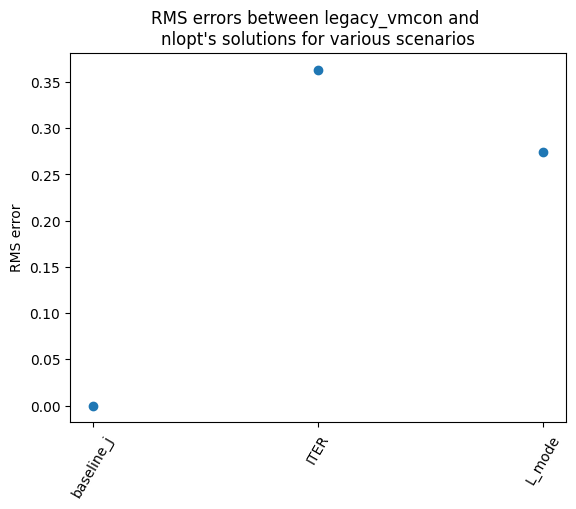

In [3]:
results_df = ps.compare_solvers_regression_tests(["legacy_vmcon", "nlopt"], scenarios=["baseline_jan_2017", "ITER", "L_mode"], rerun_tests=False)

All three regression scenarios converge, but their constraints are violated, as with `CONSTR_TOL = 1e-8`.